# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Burhanudin Zuhri
- Email: burhanudinzuhri25@gmail.com
- Id Dicoding: burhanudinzuhri

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda dalam setahun dan manakah tahun yang lebih unggul?
- Bagaimana pengaruh variabel pada dataset seperti temp dan atemp, dan humidity, terhadap jumlah total pengguna sepeda?
- Bagaimana kondisi penggunaan sepeda pada weekday, working day, dan holiday?
- Apakah terdapat pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?
- Apakah terdapat keterkaitan antara kondisi cuaca dan jumlah pengguna sepeda?

## Menyaipkan semua library yang dibuthkan

Mengimport semua library yang dibutuhkan.

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Data Wrangling

### Gathering Data

Mengumpulkan data yang dibutuhkan. Untuk Bike Sharing Dataset diharuskan mengimpor file day.csv dan hour.csv

### Load tabel day

In [178]:
data_day = pd.read_csv("/content/day.csv")
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Load tabel hour

In [179]:
data_hour = pd.read_csv("/content/hour.csv")
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### Pemeriksaan dataframe data_day

1. Memeriksa informasi seperti tipe data pada dataframe data_day

In [180]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat terlihat bahwa terdapat 1 kolomnya yang tidak sesuai tipe datanya yaitu dteday yang memiliki tipe data object

2. Memeriksa missing values

In [181]:
data_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat terlihat bahwa dataframe data_day tidak terdapat missing values

3. Memeriksa duplikasi data

In [182]:
print("Jumlah duplikasi data: ", data_day.duplicated().sum())

Jumlah duplikasi data:  0


Dapat terlihat bahwa dataframe data_day tidak terdapat duplikasi data.

4. Memeriksa nilai statistik pada dataframe

In [183]:
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat terlihat bahwa dataframe memiliki nilai statistik yang normal.

###  Pemeriksaan dataframe data_hour

1. Memeriksa informasi seperti tipe data pada dataframe data_hour

In [184]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat terlihat bahwa terdapat 1 kolomnya yang tidak sesuai tipe datanya yaitu dteday yang memiliki tipe data object

2. Memeriksa missing values

In [185]:
data_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat terlihat bahwa dataframe data_hour tidak terdapat missing values

3. Memeriksa duplikasi data

In [186]:
print("Jumlah duplikasi data: ", data_hour.duplicated().sum())

Jumlah duplikasi data:  0


4. Memeriksa nilai statistik pada dataframe

In [187]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat terlihat bahwa dataframe memiliki nilai statistik yang normal.

### Cleaning Data

1. Menghapus tabel yang tidak diperlukan

Menghapus terlebih dahulu dataframe data_hour dengan alasan karena relevansi pertanyaan bisnis.

In [188]:
del data_hour

2. Menghapus beberapa kolom yang tidak akan digunakan

Kolom yang akan dihapus yaitu instant dan windspeed dikarenakan tidak terkait dengan pertanyaan bisnis.

In [189]:
drop_coloumn = ['instant', 'windspeed']

for i in data_day.columns:
  if i in drop_coloumn:
    data_day.drop(labels=i, axis=1, inplace=True)

data_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3. Mengubah nama kolom

Alasan mengubah nama kolom yaitu untuk mempermudah dalam pembacaan nama kolom

In [190]:
# Mengubah nama kolom
data_day.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

data_day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [191]:
# Mengubah angka pada beberapa kolom menjadi keterangan
data_day['month'] = data_day['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
data_day['season'] = data_day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
data_day['weekday'] = data_day['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
data_day['weather_cond'] = data_day['weather_cond'].map({
    1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy', 3: 'Light Snow/Rain', 4: 'Severe Weather'
})

In [192]:
# Mengubah tipe data object ke datetime
data_day['dateday'] = pd.to_datetime(data_day.dateday)

# Mengubah tipe data ke categorical
data_day['season'] = data_day.season.astype('category')
data_day['year'] = data_day.year.astype('category')
data_day['month'] = data_day.month.astype('category')
data_day['holiday'] = data_day.holiday.astype('category')
data_day['weekday'] = data_day.weekday.astype('category')
data_day['workingday'] = data_day.workingday.astype('category')
data_day['weather_cond'] = data_day.weather_cond.astype('category')

data_day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [193]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## Exploratory Data Analysis (EDA)

### Eksplorasi Data data_day

1. Mengelompokkan penyewa sepeda berdasarkan bulan.

In [194]:
data_day.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Dapat disimpulkan bahwa bulan Juni merupakan bulan yang memiliki rata-rata terbesar dan jumlah terbanyak dalam penyewaan sepeda. Sedangkan bulan Januari merupakan rata-rata terkecil dan jumlah terkecil dalam penyewaan sepeda.

2. Mengelompokkan penyewa sepeda berdasarkan keadaan cuaca.

In [195]:
data_day.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Dapat disimpulkan bahwa penyewa sepeda lebih banyak menyewa sepeda pada saat cuaca sedang cerah atau mendung. Dan ketika salju turun dan cuaca sedang sangat buruk hanya sedikit penyewa sepeda yang menyewa sepeda.

3. Mengelompokkan penyewa sepeda berdasarkan holiday.

In [196]:
data_day.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Dapat telihat bahwa penyewa sepeda lebih banyak menyewa sepeda pada saat hari biasa atau bukan hari-hari libur.

4. Membandingkan penyewa sepeda pada saat hari kerja dengan akhir pekan.

In [197]:
data_day.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Dapat telihat bahwa penyewaan sepeda dari yang terbannyak kadalah Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

5. Mengelompokkan penyewa sepeda berdasarkan workingday.

In [198]:
data_day.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Dapat terlihat bahwa jumlah penyewaan sepeda terbanyak terdapat pada workingday atau hari kerja dibandingkan dengan hari non-workingday.

6. Mengelompokkan penyewa sepeda berdasarkan season.

In [199]:
data_day.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Dapat terlihat bahwa penyewaan sepeda paling banyak terjadi pada musim gugur (Fall). Sedangkan yang paling sedikit adalah pada musim semi (Spring).

7. mengelompokkan temp, hum, dan humidity berdasarkan season.

In [200]:
data_day.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

Dapat disimpulkan bahwa rata-rata temperatur dan atemp tertinggi terjadi pada musim gugur (fall season). Kemudian Rata-rata humidity tertinggi terjadi pada musim dingin (winter season).

8. Mencari korelasi antara penyewa casual, registered, dan count

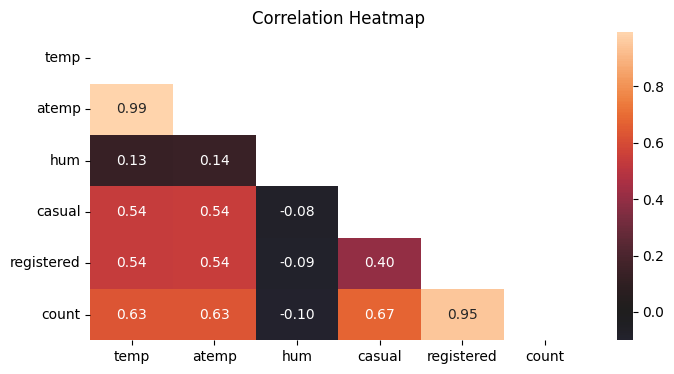

In [201]:
fig, ax = plt.subplots(figsize=(8,4))
corr_matrix = data_day.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix,
    annot=True,
    mask=mask,
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil analisis diatas, didapat disimpulkan sebagai berikut:
- atemp memiliki korelasi yang kuat dengan temp (0.99).
- hum memiliki korelasi yang lemah dengan temp dan atemp (0.13 dan 0.14).
- casual memiliki korelasi yang sedang dengan temp dan atemp (0.54), dan  negatif dengan hum (-0.08).
- registered memiliki pola yang sama seperti casual, dan berkorelasi sedang dengan casual (0.40).
- count memiliki korelasi yang kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95), namun memiliki korelasi yang negatif dengan hum (-0.10).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda dalam setahun dan manakah tahun yang lebih unggul?

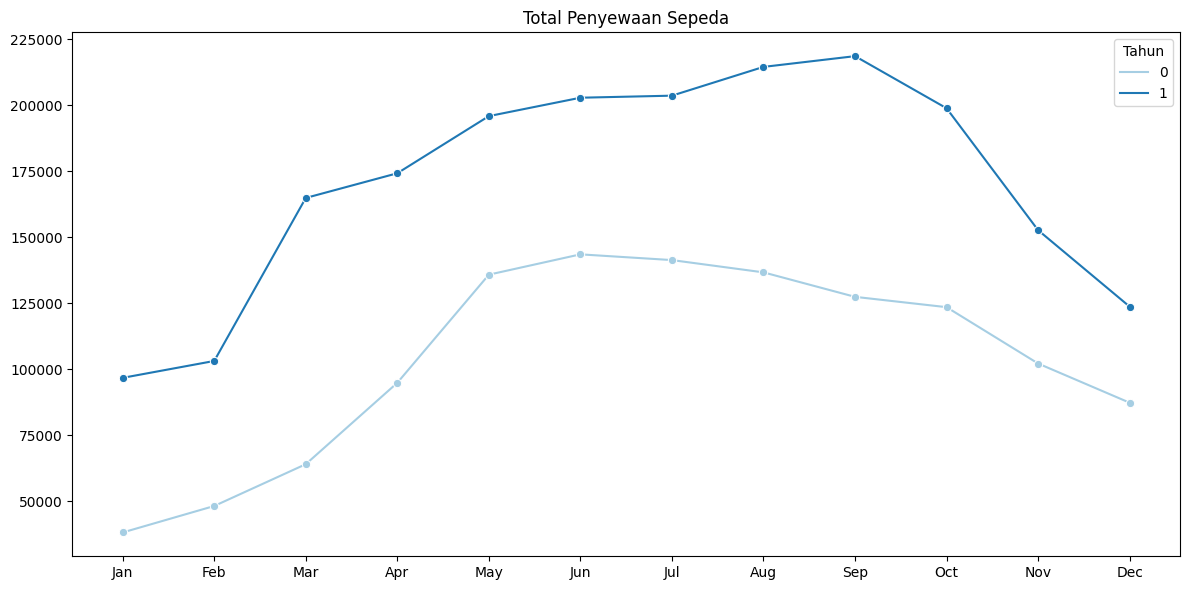

In [202]:
plt.figure(figsize=(12,6))

data_day['month'] = pd.Categorical(data_day['month'], categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)

monthly_counts = data_day.groupby(by=["month","year"]).agg({
    "count":"sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="Paired",
    marker="o")

plt.title("Total Penyewaan Sepeda")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi lineplot data diatas, dapat disimpulkan bahwa tahun 2012(1) lebih unggul dari tahun 2011 (0) dari januari sampai desember. Puncak penyewaan sepeda terjadi pada bulan September tahun 2012. Sedangkan penyewaan terendah terjadi pada bulan Januari tahun 2011.

### Pertanyaan 2: Bagaimana pengaruh variabel pada dataset seperti temp dan atemp, dan humidity, terhadap jumlah total pengguna sepeda?





Text(0.5, 1.0, 'Humidity dengan Count')

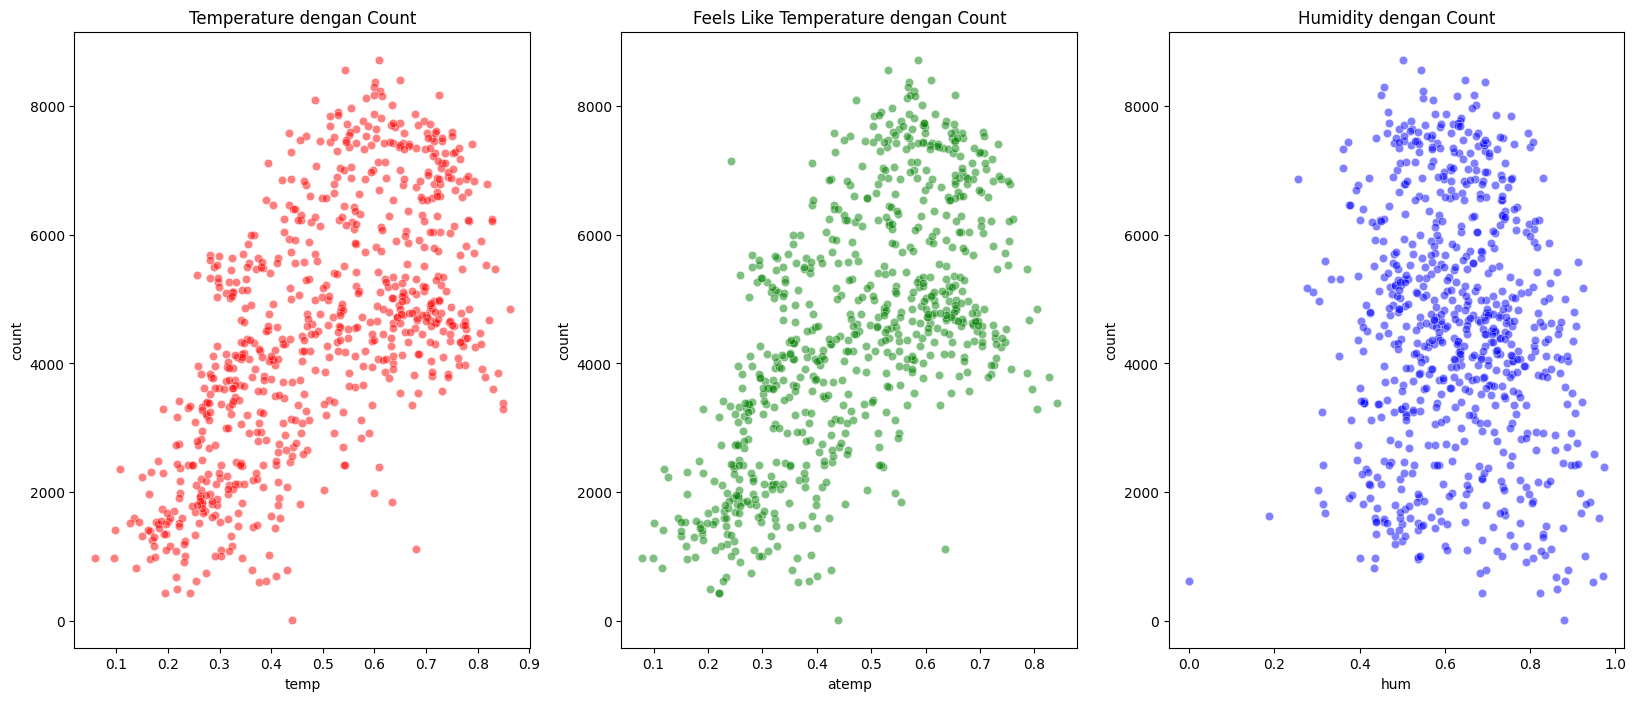

In [203]:
plt.figure(figsize=(20, 8))

# temp dengan count
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='count',
    color='red',
    data=data_day,
    alpha=0.5
)
plt.title('Temperature dengan Count')

# atemp dengan count
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='count',
    color='green',
    data=data_day,
    alpha=0.5
)
plt.title('Feels Like Temperature dengan Count')

# hum dengan count
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='hum',
    y='count',
    color='blue',
    data=data_day,
    alpha=0.5
)
plt.title('Humidity dengan Count')

Berdasarkan hasil scatter plot di atas, dapat disimpulkan bahwa antara temp dan count memiliki korelasi yang positif. Kemudian antara atemp dan count juga memiliki korelasi yang positif. Sedangkan antara hum dan count memiliki korelasi yang negatif, namun tidak terlalu signifikan. Dengan kata lain apabila temperatur (temp dan atemp) mengalami peningkatan, maka pengguna sepeda juga cenderung mengalami peningkatan. Dedangkan pengaruh dari humidity sangat kecil dengan penyewaan sepeda, meskipun memiliki kecenderungan dapat menurunkan jumlah pengguna sepeda.

### Pertanyaan 3: Bagaimana kondisi penggunaan sepeda pada weekday, working day, dan holiday?

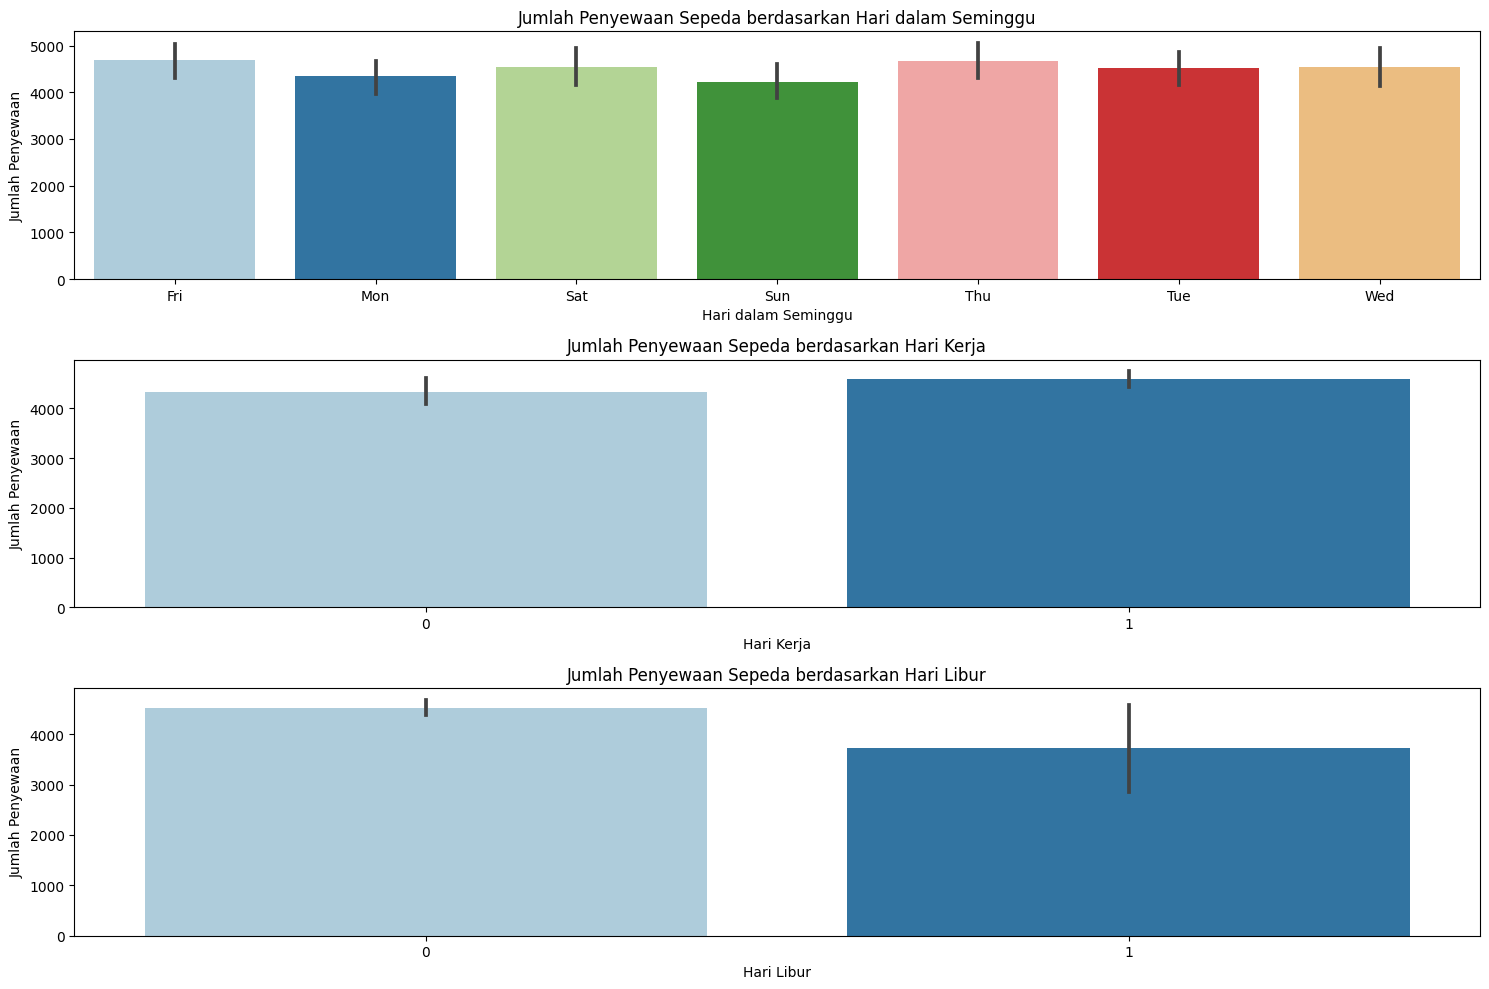

In [204]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# weekday
sns.barplot(
    x='weekday',
    y='count',
    palette='Paired',
    data=data_day,
    ax=axes[0])
axes[0].set_title('Jumlah Penyewaan Sepeda berdasarkan Hari dalam Seminggu')
axes[0].set_xlabel('Hari dalam Seminggu')
axes[0].set_ylabel('Jumlah Penyewaan')

# workingday
sns.barplot(
    x='workingday',
    y='count',
    palette='Paired',
    data=data_day,
    ax=axes[1])
axes[1].set_title('Jumlah Penyewaan Sepeda berdasarkan Hari Kerja')
axes[1].set_xlabel('Hari Kerja')
axes[1].set_ylabel('Jumlah Penyewaan')

# holiday
sns.barplot(
    x='holiday',
    y='count',
    palette='Paired',
    data=data_day,
    ax=axes[2])
axes[2].set_title('Jumlah Penyewaan Sepeda berdasarkan Hari Libur')
axes[2].set_xlabel('Hari Libur')
axes[2].set_ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi barplot data diatas, dapat disimpulkan bahwa jumlah penyewa sepeda lebih banyak pada hari kerja (senin - jumat) daripada akhir pekan (sabtu dan minggu). 0 menandakan akhir pekan dan 1 menandakan hari kerja.Kemudian jumlah penyewa sepeda jauh lebih banyak pada hari biasa dibandingkan hari libur. Lalu jumlah penyewa sepeda pada hari Jumat adalah hari dengan jumlah penyewa sepeda terbanyak, dan hari Minggu adalah hari dengan jumlah penyewa sepeda yang paling sedikit.

### Pertanyaan 4: Apakah terdapat pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?

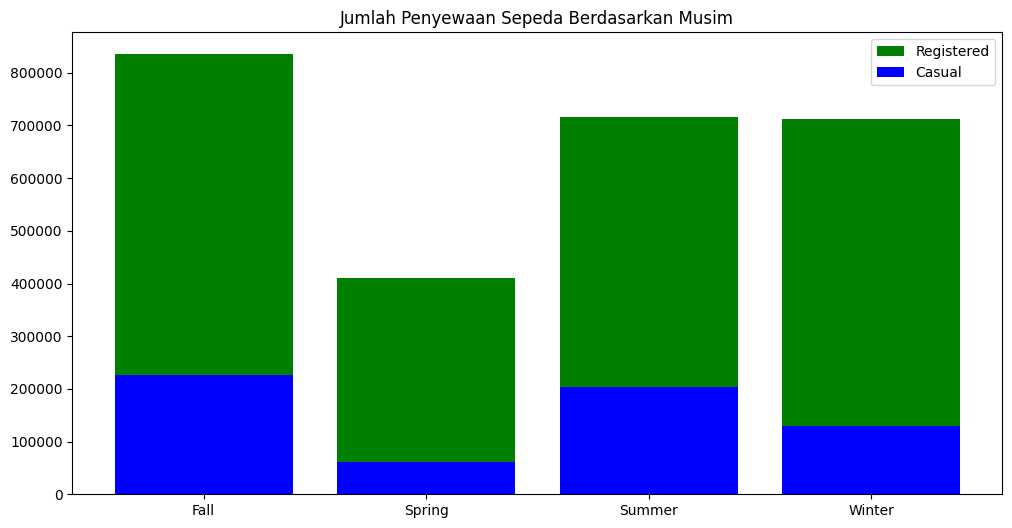

In [205]:
# Mengelompokkan data berdasarkan musim
seasonal_rental = data_day.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(12, 6))

plt.bar(
    seasonal_rental['season'],
    seasonal_rental['registered'],
    label='Registered',
    color='green',
)

plt.bar(
    seasonal_rental['season'],
    seasonal_rental['casual'],
    label='Casual',
   color='blue',
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.legend()
plt.show()

Berdasarkan hasil barplot di atas, dapat disimpulkan bahwa musim gugur (Fall) adalah musim yang paling diminati oleh penyewa sepeda baik Casual maupun Registered dalam menyewa sepeda, kemudian diikuti dengan musim panas (Summer), musim dingin (Winter), dan musim semi (Spring).

### Pertanyaan 5: Apakah terdapat keterkaitan antara kondisi cuaca dan jumlah pengguna sepeda?

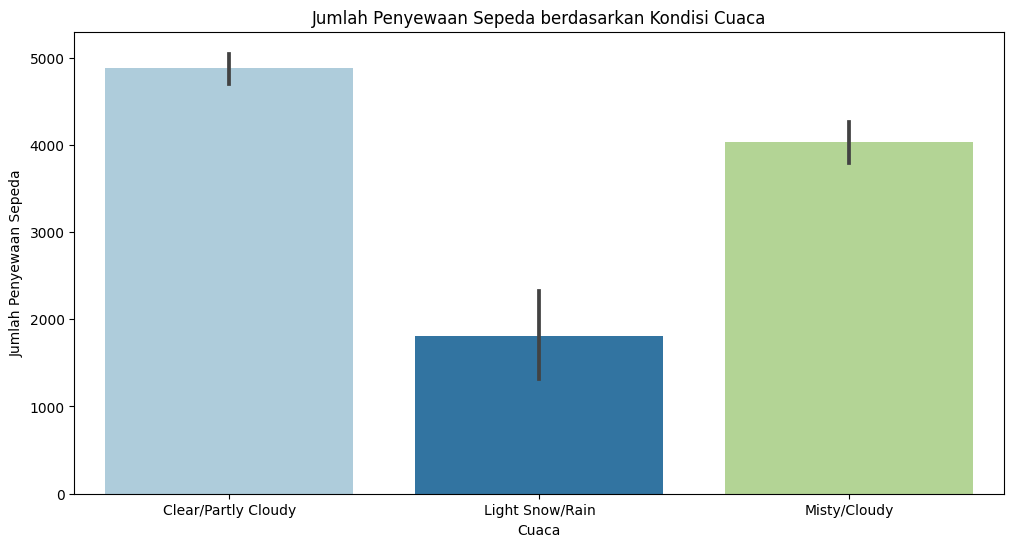

In [206]:
plt.figure(figsize=(12,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=data_day,
    palette='Paired')
plt.title('Jumlah Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Berdasarkan visualisasi barplot di atas, dapat disimpulkan bahwa terdapat keterkaitan antara kondisi cuaca dan penyewa sepeda, yang dimana kondisi cuaca saat sedang cerah/setengah mendung menjadi kondisi yang paling banyak dalam penyeewaan sepeda, kemudian diikuti dengan cuaca berkabut/mendung, dan terakhir  cuaca sedang sedikit bersalju/hujan menjadi yang paling sedikit banyak.

## Conclusion

- Conclusion Pertanyaan 1:
Pada visualisasi tahun 2011 dan 2012, terlihat perbedaan puncak dan dasar bulan. Puncak sewa terjadi pada bulan Juni untuk tahun 2011 dan September untuk tahun 2012, sementara dasarnya sama yaitu bulan Januari. Jumlah total sepeda yang disewakan pada tahun 2012 secara keseluruhan lebih tinggi dibandingkan tahun 2011.

- Conclusion Pertanyaan 2:
Dari tiga visualisasi yang disajikan, terlihat bahwa temperatur (temp dan atemp) memiliki korelasi positif dengan jumlah pengguna sepeda (count), menunjukkan bahwa semakin tinggi suhu, semakin banyak pengguna sepeda. Sebaliknya, humidity memiliki korelasi negatif meskipun tidak begitu signifikan, menunjukkan bahwa kenaikan humidity dapat sedikit mengurangi jumlah pengguna sepeda.

- Conclusion Pertanyaan 3:
Kondisi penggunaan sepeda terbagi menjadi tiga bagian berdasarkan workingday, holiday, dan weekday. Pada workingday, jumlah pengguna lebih tinggi dibandingkan non-workingday, meskipun perbedaannya tidak terlalu signifikan. Pada holiday, non-holiday justru lebih diminati, menunjukkan bahwa pengguna lebih suka menyewa sepeda pada hari-hari biasa. Berdasarkan weekday, Jumat (Fri) menjadi hari dengan jumlah pengguna tertinggi, sedangkan Minggu (Sun) berada di urutan terakhir.

- Conclusion Pertanyaan 4:
Hasil visualisasi menunjukkan bahwa musim gugur menjadi yang paling diminati dalam penyewaan sepeda. Hasil ini dapat dipengaruhi oleh berbagai faktor, termasuk kondisi cuaca, temperatur udara, hari kerja, dan hari libur.

- Conclusion Pertanyaan 5:
Terdapat keterkaitan antara kondisi cuaca dan jumlah pengguna sepeda. Para penyewa sepeda cenderung lebih banyak terjadi pada cuaca yang cerah atau sedikit mendung. Kondisi kedua paling diminati adalah cuaca berkabut atau mendung. Sebaliknya, pengguna cenderung kurang menyukai kondisi sedikit bersalju atau hujan. Tidak ada data untuk cuaca buruk atau badai besar, yang wajar karena kondisi tersebut tidak memungkinkan untuk bersepeda.
